<a href="https://colab.research.google.com/github/Dat1202/PythonColab1/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_Colaboratory_ch%C3%A0o_m%E1%BB%ABng_b%E1%BA%A1n!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from plotnine import *

# **1. Giới thiệu về nguồn dữ liệu**

In [ ]:
df = pd.read_csv("/content/house.csv")

In [ ]:
num_rows, num_cols = df.shape
print(f"Tập dữ liệu có {num_cols} cột và {num_rows} hàng")

Tập dữ liệu có 7 cột và 4308 hàng


In [ ]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Biến phân loại:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Biến số nguyên:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Biến số thực:",len(fl_cols))

Biến phân loại: 0
Biến số nguyên: 2
Biến số thực: 5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4179 non-null   float64
 1   net_sqm          4222 non-null   float64
 2   center_distance  4221 non-null   float64
 3   metro_distance   4174 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 235.7 KB


In [ ]:
## dữ liệu bị thiếu
for col in df.columns:
  missing_count = df[col].isnull().sum()

  print(f"Cột {col} có {missing_count} dữ liệu thiếu")

Cột bedroom_count có 129 dữ liệu thiếu
Cột net_sqm có 86 dữ liệu thiếu
Cột center_distance có 87 dữ liệu thiếu
Cột metro_distance có 134 dữ liệu thiếu
Cột floor có 0 dữ liệu thiếu
Cột age có 0 dữ liệu thiếu
Cột price có 0 dữ liệu thiếu


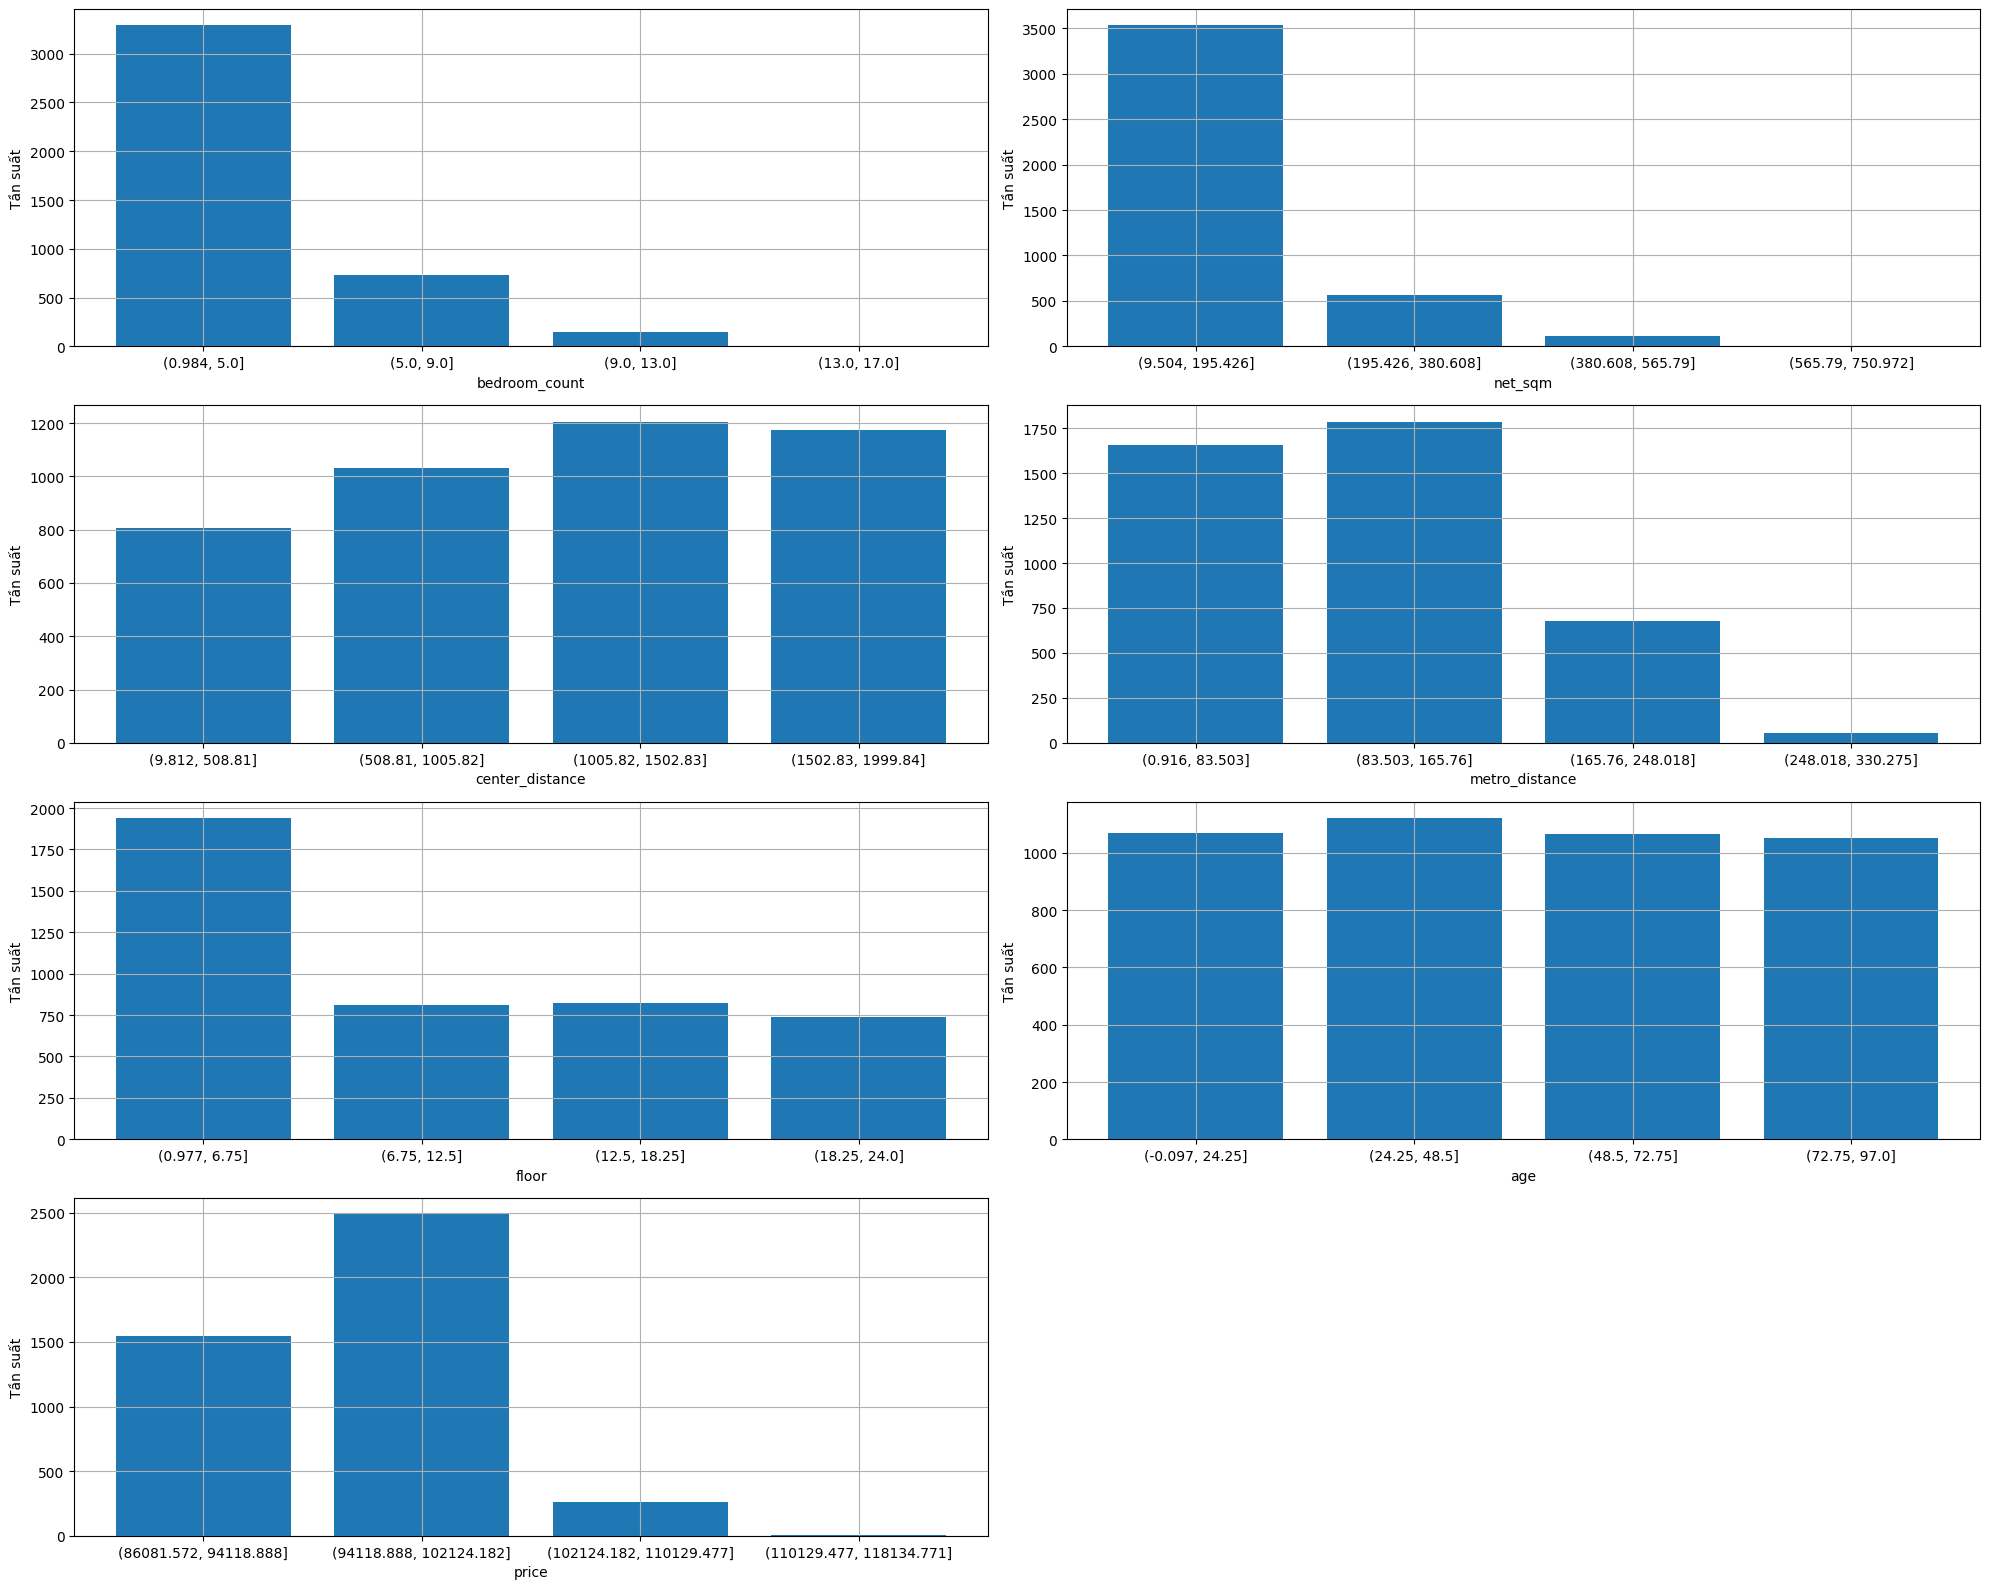

In [ ]:
columns = df.columns
r = 4 # Số hàng trong lưới subplot
c = 2  # Số cột trong lưới subplot
it = 1  # Bước tăng để theo dõi vị trí subplot


fig = plt.figure(figsize=(20, 16))
for column in columns:
    column_value_counts = pd.cut(df[column], bins=4).value_counts()

    frequency_count = pd.cut(df[column], bins=4).value_counts().sort_index()
    frequency = frequency_count.values

    labels = [str(interval) for interval in frequency_count.index]

    plt.subplot(r, c, it)
    plt.bar(labels, frequency)
    plt.xlabel(column)
    plt.ylabel('Tần suất')
    plt.grid()
    it += 1

plt.tight_layout()
plt.show()

# **2. Phương pháp, kỹ thuật tiền xử lý, tích hợp dữ liệu**

## 2.1. Drop những phòng có **age** trên 70

In [ ]:
#số cột và hàng của tập trước khi drop
row_count, col_count = df.shape
print("Số hàng:", row_count)
print("Số cột:", col_count)

Số hàng: 4308
Số cột: 7


In [ ]:
#drop các dữ liệu cột "age" có giá trị trên 70
df = df.drop(df[df['age'] > 70].index)

In [ ]:
#số cột và hàng của tập sau khi drop
row_count, col_count = df.shape
print("Số hàng:", row_count)
print("Số cột:", col_count)

Số hàng: 3155
Số cột: 7


# 2.2. Điền dữ liệu thiếu

## 2.2.1. bedroom_count

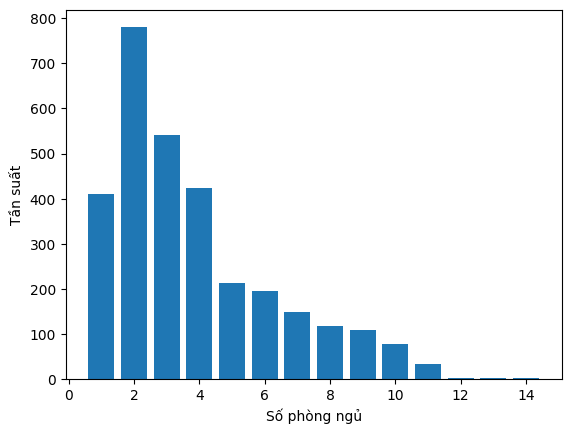

In [ ]:
bedroom_count = df['bedroom_count'].value_counts().sort_index()
frequency = bedroom_count.values

plt.bar(bedroom_count.index, frequency)
plt.xlabel('Số phòng ngủ')
plt.ylabel('Tần suất')

plt.show()

In [ ]:
bedroom_count_median = df['bedroom_count'].median()
print(f"Giá trị sẽ điền vào cột bedroom_count: {bedroom_count_median}")
df['bedroom_count'].fillna(bedroom_count_median, inplace=True)

Giá trị sẽ điền vào cột bedroom_count: 3.0


## 2.2.2. net_sqm

(9.696, 161.041]      2357
(161.041, 311.782]     561
(311.782, 462.524]     139
(462.524, 613.265]      33
Name: net_sqm, dtype: int64


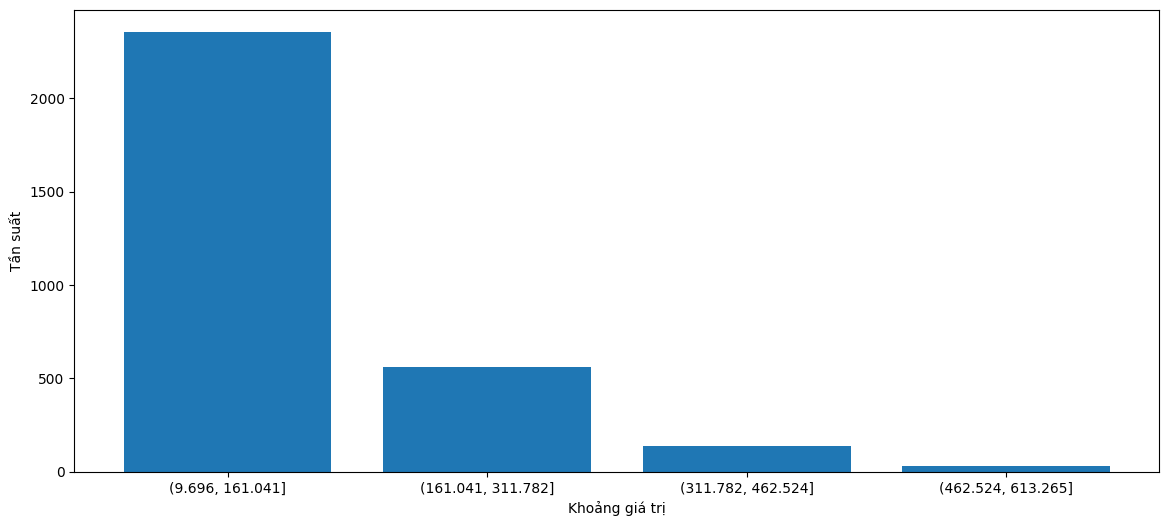

In [ ]:
net_sqm_value_counts = pd.cut(df['net_sqm'], bins=4).value_counts()
print(net_sqm_value_counts)

net_sqm_count = pd.cut(df['net_sqm'], bins=4).value_counts().sort_index()
frequency = net_sqm_count.values

#chuyển các khoảng thành chuỗi
labels = [str(interval) for interval in net_sqm_count.index]

plt.figure(figsize=(14, 6))
plt.bar(labels, frequency)
plt.xlabel('Khoảng giá trị')
plt.ylabel('Tần suất')

plt.show()

In [ ]:
net_sqm_median = df['net_sqm'].median()
print(f"Giá trị sẽ điền vào cột net_sqm: {net_sqm_median}")
df['net_sqm'].fillna(net_sqm_median, inplace=True)

Giá trị sẽ điền vào cột net_sqm: 94.21422111999999


## 2.2.3. center_distance

(1668.5, 1999.84]     588
(1337.16, 1668.5]     585
(1005.82, 1337.16]    557
(674.48, 1005.82]     521
(343.14, 674.48]      438
(9.812, 343.14]       399
Name: center_distance, dtype: int64


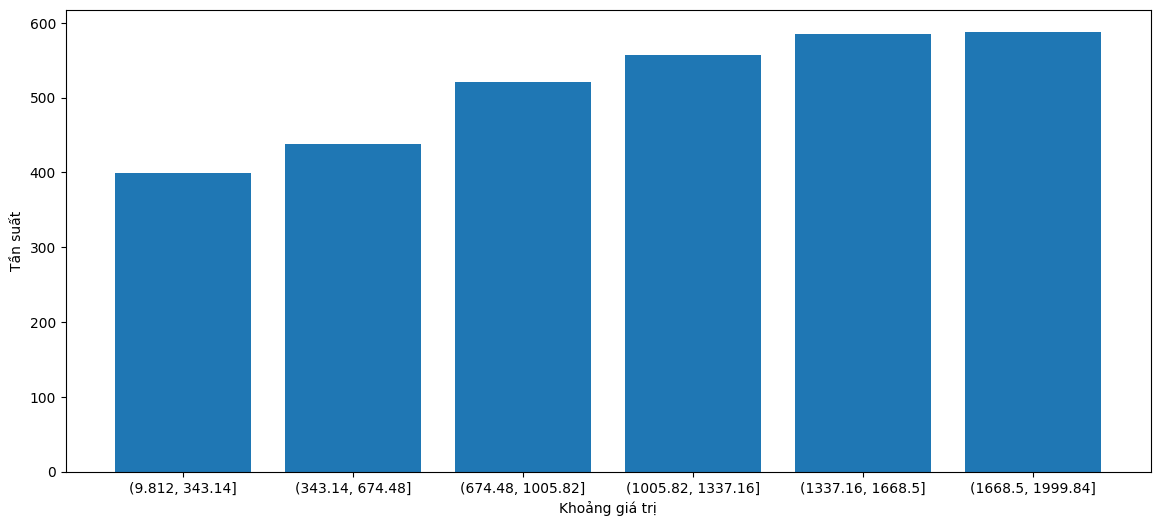

In [ ]:
value_counts_center_distance = pd.cut(df['center_distance'], bins=6).value_counts()
print(value_counts_center_distance)

center_distance_count = pd.cut(df['center_distance'], bins=6).value_counts().sort_index()
frequency = center_distance_count.values

#chuyển các khoảng thành chuỗi
labels = [str(interval) for interval in center_distance_count.index]

plt.figure(figsize=(14, 6))
plt.bar(labels, frequency)
plt.xlabel('Khoảng giá trị')
plt.ylabel('Tần suất')

plt.show()

In [ ]:
center_distance_mean = df['center_distance'].mean()
print(f"Giá trị sẽ điền vào cột center_distance: {center_distance_mean}")
df['center_distance'].fillna(center_distance_mean, inplace=True)

Giá trị sẽ điền vào cột center_distance: 1084.8951748704662


## 2.2.4. metro_distance

(83.503, 165.76]      1381
(0.916, 83.503]       1233
(165.76, 248.018]      498
(248.018, 330.275]      43
Name: metro_distance, dtype: int64


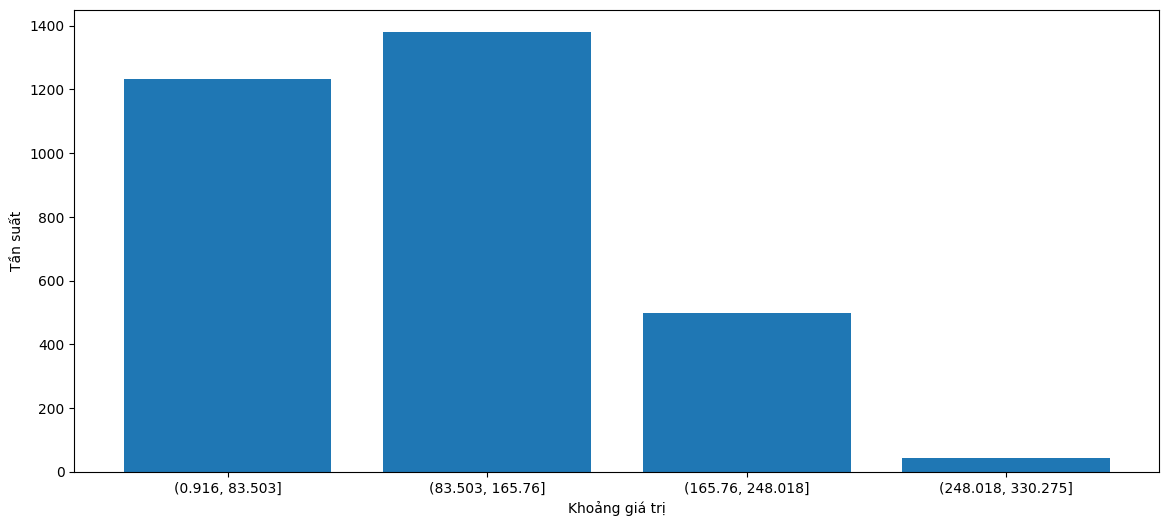

In [ ]:
value_counts_metro_distance = pd.cut(df['metro_distance'], bins=4).value_counts()
print(value_counts_metro_distance)

metro_distance_count = pd.cut(df['metro_distance'], bins=4).value_counts().sort_index()
frequency = metro_distance_count.values

#chuyển các khoảng thành chuỗi
labels = [str(interval) for interval in metro_distance_count.index]

plt.figure(figsize=(14, 6))
plt.bar(labels, frequency)
plt.xlabel('Khoảng giá trị')
plt.ylabel('Tần suất')

plt.show()

In [ ]:
metro_distance_mean = df['metro_distance'].median()
print(f"Giá trị sẽ điền vào cột metro_distance: {metro_distance_mean}")
df['metro_distance'].fillna(metro_distance_mean, inplace=True)

Giá trị sẽ điền vào cột metro_distance: 100.63335855


# 2.4. Loại bỏ outlier

## Thông thường 1 phòng có 12m2. Giả sử nếu nhà 20m2 mà có 2 phòng => là điểm dữ liệu đáng nghi ngờ, cần được xem xét lại => xem như nó là Outlier và xóa bỏ khỏi dataset. Vậy chúng ta sẽ giữ lại những điểm dữ liệu có tối thiểu 12m2 cho mỗi phòng.

In [ ]:
#số cột và hàng của tập trước khi drop outlier
row_count, col_count = df[df.net_sqm/df.bedroom_count <= 12 ].shape
print("Số hàng:", row_count)
print("Số cột:", col_count)

Số hàng: 200
Số cột: 7


In [ ]:
# tiến hành drop dữ liệu outlier
df = df.drop(df[df.net_sqm/df.bedroom_count <= 12].index)

In [ ]:
#số cột và hàng của tập sau khi drop outlier
row_count, col_count = df.shape
print("Số hàng:", row_count)

Số hàng: 2955


In [ ]:
df.to_csv('house_preprocessing.csv', index=False)

# **2. Dữ liệu sau khi xử lí**

In [ ]:
df_preprocessing = pd.read_csv("/content/house_preprocessing.csv")

In [ ]:
for col in df_preprocessing.columns:
  missing_count = df_preprocessing[col].isnull().sum()
  print(f"Cột {col} có {missing_count} dữ liệu thiếu")

Cột bedroom_count có 0 dữ liệu thiếu
Cột net_sqm có 0 dữ liệu thiếu
Cột center_distance có 0 dữ liệu thiếu
Cột metro_distance có 0 dữ liệu thiếu
Cột floor có 0 dữ liệu thiếu
Cột age có 0 dữ liệu thiếu
Cột price có 0 dữ liệu thiếu



## 3.1 Thống kê mô tả:


In [ ]:
num_rows, num_cols = df_preprocessing.shape
print(f"Số cột: {num_cols}")
print(f"Số hàng: {num_rows}")

Số cột: 7
Số hàng: 2955


In [ ]:
df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,2955.000000,2955.000000,2893.000000,2862.000000,2955.000000,2955.000000,2955.000000
mean,3.776311,126.764586,1087.165378,105.589626,9.354653,35.684602,96275.719751
std,2.479786,96.258705,558.430493,61.227085,7.546164,20.188566,3870.757898
min,1.000000,12.024328,11.800000,1.245338,1.000000,0.000000,86549.568450
25%,2.000000,59.133494,629.330000,55.560845,2.000000,18.000000,93539.250840
50%,3.000000,97.111989,1140.820000,100.853510,8.000000,37.000000,95945.799800
75%,5.000000,160.037917,1554.040000,149.202000,16.000000,53.000000,98506.621490
max,14.000000,613.265018,1999.840000,330.275318,24.000000,70.000000,116379.466900
